<a href="https://colab.research.google.com/github/Marcos-VM-1708/alura_moment/blob/main/dados_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown "https://github.com/alura-cursos/reducao-dimensionalidade/archive/refs/heads/master.zip"

Downloading...
From: https://github.com/alura-cursos/reducao-dimensionalidade/archive/refs/heads/master.zip
To: /content/master.zip
1.85MB [00:00, 13.5MB/s]


In [ ]:
!unzip /content/master.zip

Archive:  /content/master.zip
bdf674502833bf6c98a4f6f2b67a523266b214c0
replace reducao-dimensionalidade-master/.gitignore? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<h1>classificador 
<b>
 
>modelo = random forest 
<br>[documentação random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
<br>testa acurácia do modelo para cada tratamento de dados 
</b>

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random
from sklearn.ensemble import RandomForestClassifier

def classifier(x, y):
  # define aleatoriedade:
  seed = 5254
  random.seed(seed)

  # separa os dados treino e teste
  x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = seed, test_size = 0.2)

  modelo = RandomForestClassifier(random_state = seed) # algoritimo de decisões 
  modelo.fit(x_train, y_train)         # treina o modelo
  score = modelo.score(x_test, y_test) # teste de acuracia 

  return print("score: %.2f%%" % (score * 100))

<h1>
ferramenta de exibição
</h1>
 
><b>Apenas para exibição das features da base de dados.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def grafico(base,x, y, til, size):

  dados_plot = pd.concat([diagnostico, base.iloc[:,x:y]],axis = 1) 
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name='valores') 
  
  plt.figure(figsize=(size, 5))
  sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split= True).set(title= til)
  plt.xticks(rotation = 90)

<h1>
base de dados crua


In [ ]:
import pandas as pd 

# open data:
data = "/content/reducao-dimensionalidade-master/data-set/exames.csv"
data = pd.read_csv(data)
data.head(1)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.1184,0.2776,0.3001,...,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.1189,NaN


<h1>Dados não escalada
 
>verifica-se dados irregulares ou seja, de larga escala. 

In [ ]:
# y
diagnostico = data["diagnostico"]

# x
exames = data.drop(columns=['id', 'diagnostico']) 

# drop de coluna com valores não numericos(NAN)
exames_1 = exames.drop(columns="exame_33")

# base de dados com elemento modificado v_1
data_not_escalavel = pd.concat([diagnostico, exames_1.iloc[:,0:10]],axis = 1)
exames_1.head(1)

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.8,103.78,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.1189


In [ ]:
classifier(exames_1, diagnostico)

score: 95.61%


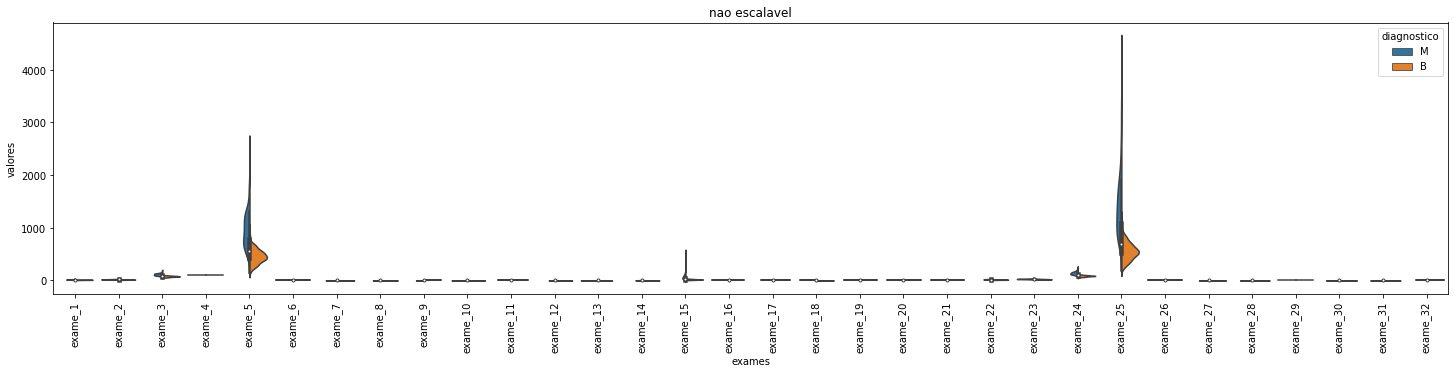

In [ ]:
# grafico
grafico(exames_1, 0, 32, "nao escalavel", 25)

<h2>
base de dados escalada
</h2>

>[documentação do escalador (StandardScaler)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)


In [ ]:
from sklearn.preprocessing import StandardScaler

# drop de colunas com valores identicos
exames_1 = exames_1.drop(columns=["exame_4", "exame_29"])

model = StandardScaler()             #escalador 

model.fit(exames_1)                  # treina o escalador
exames_2 = model.transform(exames_1) #transforma a base de dados

exames_2 = pd.DataFrame(data = exames_2, columns = exames_1.keys())

data_scalate = pd.concat([diagnostico, exames_2.iloc[:,0:10]],axis = 1)
data_scalate.head(1)

,diagnostico,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747


In [ ]:
classifier(exames_2, diagnostico)

score: 96.49%


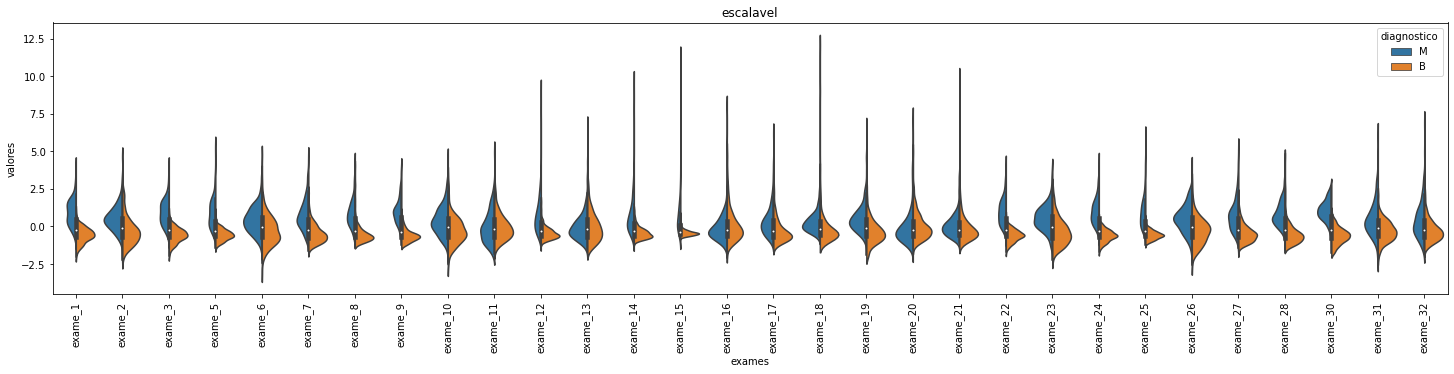

In [ ]:
# grafico
grafico(exames_2, 0, 32, "escalavel", 25)

<h1>
correlação


[Text(0.5, 1.0, 'correlação de dados')]

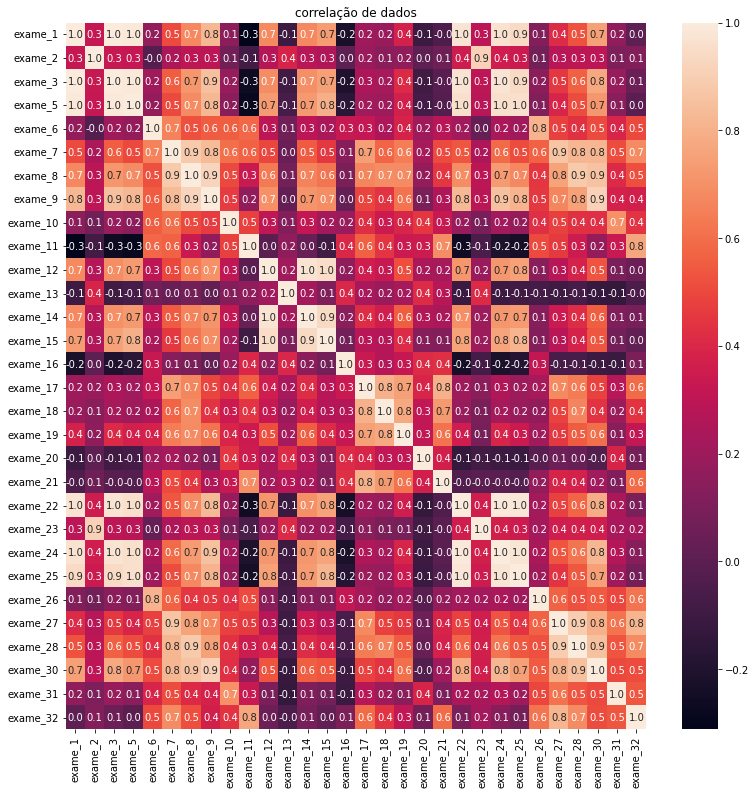

In [ ]:
matriz = exames_2.corr()
plt.figure(figsize = (13, 13))
sns.heatmap(matriz, annot = True, fmt = ".1f").set(title = "correlação de dados")

In [ ]:
# nota se que a correlação das fitures 1 e 3, 22, 24 estão correlacionados.
# pra essa situação pode testar duas possibilidades deletar todas essas fitures ou deletar apenas uma de cada no caso (1,22 ou 3,24)
matriz_1 = matriz[matriz > 0.99]
matriz_1.sum()

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

<h1>
tratamento de features correlacionadas 
 
>observou que a melhor eficácia do modelo foi quando deletamos apenas 1 para cada feature relacionada.

In [ ]:
exames_3 = exames_2.drop(columns=["exame_3", "exame_22"])
classifier(exames_3, diagnostico)

score: 98.25%


In [ ]:
exames_4 = exames_2 = exames.drop(columns=["exame_1", "exame_3", "exame_22", "exame_24", "exame_33"])
classifier(exames_4, diagnostico)

score: 96.49%


<h1>
k_best

>melhores features para treino 
<br>[documentação do kbest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
                           # 5 melhores features
k_best = SelectKBest(chi2, k = 5)

exames_6 = exames_1.drop(columns=(["exame_3", "exame_24"]))

# k_best não acita values negativos por isso testo com dados não escalados
x_train, x_test, y_train, y_test  = train_test_split(exames_6, diagnostico, test_size = 0.2)

top_5 = k_best.fit(x_train, y_train)
train_kbest = top_5.transform(x_train)
test_kbest = top_5.transform(x_test)

In [ ]:
train_kbest.shape, test_kbest.shape

((455, 5), (114, 5))

## <b>
k_best ainda não superou o melhor modelo porem vale a tentativa. rssss

In [ ]:
classificador = RandomForestClassifier(n_estimators=100, random_state=1234)
classificador.fit(train_kbest, y_train)
print("score: %.2f%%" %(classificador.score(test_kbest, y_test)*100))

score: 92.98%


<h1>rfe

>Classificação de recursos com eliminação de recursos recursivos.<br>
>[documentação rfe](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)


In [ ]:
from sklearn.feature_selection import RFE

treino_x, teste_x, treino_y, teste_y = train_test_split(exames_6, diagnostico, test_size = 0.2)

classifier = RandomForestClassifier(n_estimators=100, random_state=1234)

classifier.fit(treino_x, treino_y) # treina o modelo random forest

model_rfe = RFE(estimator = classifier, n_features_to_select = 5, step = 1) 

model_rfe.fit(treino_x, treino_y) # treina as melhores features 

# transfoma as features de treino e teste:
treino_rfe = model_rfe.transform(treino_x)
teste_rfe = model_rfe.transform(teste_x)

classifier.fit(treino_rfe, treino_y)

print("score: %.2f%%" %(classifier.score(teste_rfe,teste_y)*100))

score: 96.49%


<h1>DummyClassifier

uma base para testar acuracia 

In [ ]:
from sklearn.dummy import DummyClassifier

modelo = DummyClassifier(strategy = "most_frequent")
modelo.fit(x_train, y_train)
score = modelo.score(x_test, y_test)
print("acuracia: %.2f%%" % (score * 100))

acuracia: 64.91%
